In [ ]:
#chargement des données - index_col = 0 pour indiquer que la colonne n°0 est un label
import pandas
url= 'https://raw.githubusercontent.com/ditumystro/Insurance_Data_Analysis/main/assurance_belges_2013_2014%20sans%20pr%C3%A9fixes%20v2.csv'
D = pandas.read_csv(url, index_col=0, sep=';', encoding = "utf-8")
#D = pandas.read_csv("assurance_belges_2013_2014 sans préfixes v2.csv", sep=';', index_col=0)
D

,Sinistralite,Code usage,Age,Sexe,Code Langue,Code postal,Bonus-malus n,Bonus-Malus n_1,Puissance,Date,Annee vehicule,Primes
KIDEN,,,,,,,,,,,,
1,1,2,1,1,1,2,2,1,2,1,1,1
2,1,2,1,1,2,2,1,1,1,1,1,2
3,1,2,1,1,2,2,1,1,2,1,1,2
8,1,2,1,1,1,2,1,1,2,2,1,2
11,1,2,2,1,1,2,1,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2,1,1,1,1,2,2,2,2,1,1,3
1412,1,2,1,1,2,2,1,1,1,1,1,2
1413,1,2,2,1,2,2,1,1,1,1,1,2


In [ ]:
#affichage des caractéristiques
print(D.info())

#récupération des variables actives
DActives = D[['Sinistralite', 'Code usage', 'Age', 'Sexe', 'Code Langue', \
              'Code postal', 'Bonus-malus n', 'Bonus-Malus n_1', \
              'Puissance', 'Date', 'Annee vehicule', 'Primes']]
print(DActives)

#récupération des infos - nombre de variables
p = DActives.shape[1]
print('Nombre de variables (p) : ', p)

#nombre d'observations
n = DActives.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 1 to 1415
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sinistralite     1106 non-null   int64
 1   Code usage       1106 non-null   int64
 2   Age              1106 non-null   int64
 3   Sexe             1106 non-null   int64
 4   Code Langue      1106 non-null   int64
 5   Code postal      1106 non-null   int64
 6   Bonus-malus n    1106 non-null   int64
 7   Bonus-Malus n_1  1106 non-null   int64
 8   Puissance        1106 non-null   int64
 9   Date             1106 non-null   int64
 10  Annee vehicule   1106 non-null   int64
 11  Primes           1106 non-null   int64
dtypes: int64(12)
memory usage: 112.3 KB
None
       Sinistralite  Code usage  Age  ...  Date  Annee vehicule  Primes
KIDEN                                 ...                              
1                 1           2    1  ...     1               1       1
2              

In [ ]:
#codage en 0/1
X = pandas.get_dummies(data=DActives, columns=['Sinistralite', 'Code usage', 'Age', 'Sexe', 'Code Langue', \
              'Code postal', 'Bonus-malus n', 'Bonus-Malus n_1', \
              'Puissance', 'Date', 'Annee vehicule', 'Primes'])
print(X)

#nombre total de modalités
M = X.shape[1]
print('Nombre de colonnes du tableau disjonctif (M)' , M)

       Sinistralite_1  Sinistralite_2  ...  Primes_2  Primes_3
KIDEN                                  ...                    
1                   1               0  ...         0         0
2                   1               0  ...         1         0
3                   1               0  ...         1         0
8                   1               0  ...         1         0
11                  1               0  ...         1         0
...               ...             ...  ...       ...       ...
1410                0               1  ...         0         1
1412                1               0  ...         1         0
1413                1               0  ...         1         0
1414                1               0  ...         1         0
1415                1               0  ...         0         1

[1106 rows x 26 columns]
Nombre de colonnes du tableau disjonctif (M) 26


In [ ]:
!pip install fanalysis

     |████████████████████████████████| 56 kB 2.1 MB/s 


In [ ]:
#analyse avec fanalysis
from fanalysis.mca import MCA

#instanciation
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

#propriétés
print(dir(acm))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_binarization', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', 'c_', 'col_contrib_', 'col_coord_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_labels_short_temp_', 'col_labels_temp_', 'col_topandas', 'eig_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'model_', 'n_', 'n_categories_', 'n_components', 'n_components_', 'n_vars_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plot_row_cos2', 'prefixes_', 'r_', 'row_contrib_', 'row_coord_', 'row_cos2_', 'row_labels', 'row_labels_', 'row_topandas',

In [ ]:
#nombre max de facteurs
Hmax = M-p

#numpy
import numpy

#valeurs propres
print(pandas.DataFrame(numpy.transpose(acm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Hmax+1)))

       Val.P          %     Cumul %
1   0.307962  26.396716   26.396716
2   0.144612  12.395298   38.792014
3   0.117233  10.048518   48.840532
4   0.098388   8.433274   57.273806
5   0.081867   7.017198   64.291003
6   0.074798   6.411243   70.702246
7   0.063130   5.411123   76.113370
8   0.056769   4.865929   80.979299
9   0.055760   4.779443   85.758742
10  0.042376   3.632266   89.391008
11  0.040220   3.447424   92.838432
12  0.036689   3.144737   95.983168
13  0.030434   2.608613   98.591781
14  0.016429   1.408219  100.000000


In [ ]:
#somme des carrés des valeurs propres
print(numpy.sum(acm.eig_[0]**2))

0.16774659325411995


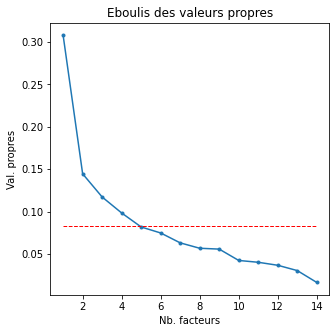

In [ ]:
#librairie graphique
import matplotlib.pyplot as plt

#éboulis des v.p.
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")

#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

In [ ]:
#récupérer les valeurs propres supérieur à (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

[0.30796169 0.14461181 0.11723271 0.09838819]


In [ ]:
#appliquer la correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[0.06004907 0.00446882 0.0013676  0.00026973]


In [ ]:
#faire la somme
S_prim = numpy.sum(lambada_prim)
print(S_prim)

#et produire les pourcentages
percent_prim = lambada_prim/S_prim*100

#affichage
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_prim,numpy.cumsum(percent_prim)])),columns=['Val.P','%','Cumul %']))

0.06615522615487522
      Val.P          %     Cumul %
0  0.060049  90.769954   90.769954
1  0.004469   6.755056   97.525010
2  0.001368   2.067266   99.592276
3  0.000270   0.407724  100.000000


In [ ]:
#somme corrigée de Greenacre
S2nd = p/(p-1)*(numpy.sum(acm.eig_[0]**2)-(M-p)/(p**2))
print(S2nd)

0.07693567748934296


In [ ]:
#pourcentage corrigé Greenacre
percent_2nd = lambada_prim/S2nd

#affichage
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_2nd,numpy.cumsum(percent_2nd)])),columns=['Val.P','%','Cumul %']))

      Val.P         %   Cumul %
0  0.060049  0.780510  0.780510
1  0.004469  0.058085  0.838595
2  0.001368  0.017776  0.856371
3  0.000270  0.003506  0.859877


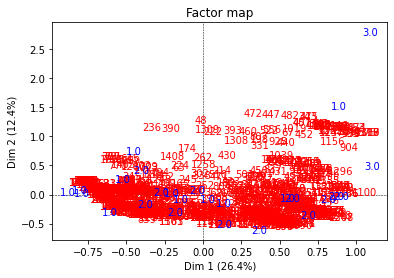

In [ ]:
#représentation dans le plan
acm.mapping(num_x_axis=1,num_y_axis=2)

In [ ]:
#affichage des coordonnées
print(pandas.DataFrame(acm.col_coord_[:,:2],index=X.columns,columns=['Coord.F1','Coord.F2']))

                   Coord.F1  Coord.F2
Sinistralite_1    -0.804489  0.081194
Sinistralite_2     0.813266 -0.082080
Code usage_1       0.882561  1.516366
Code usage_2      -0.177279 -0.304590
Age_1             -0.450927  0.747278
Age_2              0.366656 -0.607623
Sexe_1            -0.141181 -0.086064
Sexe_2             0.139446 -0.512349
Sexe_3             1.091250  2.790109
Code Langue_1      0.137505 -0.143156
Code Langue_2     -0.401786  0.418300
Code postal_1      0.552266 -0.069099
Code postal_2     -0.274265  0.034316
Bonus-malus n_1   -0.790282  0.017489
Bonus-malus n_2    0.900341 -0.019925
Bonus-Malus n_1_1 -0.881080  0.033312
Bonus-Malus n_1_2  0.868425 -0.032833
Puissance_1        0.033300 -0.078783
Puissance_2       -0.035030  0.082875
Date_1            -0.521807  0.266268
Date_2             0.688085 -0.351116
Annee vehicule_1  -0.199637  0.021131
Annee vehicule_2   0.580569 -0.061451
Primes_1          -0.608828 -0.302577
Primes_2          -0.377368 -0.157862
Primes_3    

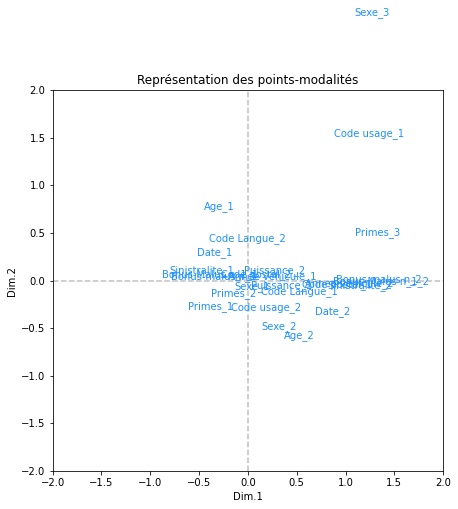

In [ ]:
#représentation dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des points-modalités")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
          
plt.show()

In [ ]:
#affichage des contributions
print(pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns,columns=['Contrib.F1','Contrib.F2']))

                   Contrib.F1  Contrib.F2
Sinistralite_1       8.804047    0.190980
Sinistralite_2       8.900091    0.193063
Code usage_1         3.525556   22.163559
Code usage_2         0.708174    4.451964
Age_1                2.467525   14.431329
Age_2                2.006381   11.734326
Sexe_1               0.383791    0.303726
Sexe_2               0.118462    3.405582
Sexe_3               2.039451   28.392274
Code Langue_1        0.381178    0.879845
Code Langue_2        1.113797    2.570894
Code postal_1        2.738611    0.091299
Code postal_2        1.360041    0.045341
Bonus-malus n_1      9.000082    0.009387
Bonus-malus n_2     10.253478    0.010694
Bonus-Malus n_1_1   10.427254    0.031742
Bonus-Malus n_1_2   10.277491    0.031286
Puissance_1          0.015383    0.183360
Puissance_2          0.016182    0.192885
Date_1               4.190226    2.323525
Date_2               5.525476    3.063935
Annee vehicule_1     0.802504    0.019147
Annee vehicule_2     2.333785    0

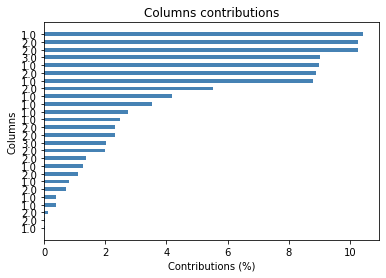

In [ ]:
#ou bien graphiquement
acm.plot_col_contrib(num_axis=1)

In [ ]:
#affichage des COS2
print(pandas.DataFrame(acm.col_cos2_[:,:2],index=X.columns,columns=['Cos2.F1','Cos2.F2']))

                    Cos2.F1   Cos2.F2
Sinistralite_1     0.654264  0.006664
Sinistralite_2     0.654264  0.006664
Code usage_1       0.156459  0.461870
Code usage_2       0.156459  0.461870
Age_1              0.165335  0.454064
Age_2              0.165335  0.454064
Sexe_1             0.049174  0.018274
Sexe_2             0.005650  0.076269
Sexe_3             0.080461  0.525994
Code Langue_1      0.055247  0.059882
Code Langue_2      0.055247  0.059882
Code postal_1      0.151467  0.002371
Code postal_2      0.151467  0.002371
Bonus-malus n_1    0.711523  0.000348
Bonus-malus n_2    0.711523  0.000348
Bonus-Malus n_1_1  0.765152  0.001094
Bonus-Malus n_1_2  0.765152  0.001094
Puissance_1        0.001167  0.006529
Puissance_2        0.001167  0.006529
Date_1             0.359048  0.093491
Date_2             0.359048  0.093491
Annee vehicule_1   0.115903  0.001299
Annee vehicule_2   0.115903  0.001299
Primes_1           0.053720  0.013269
Primes_2           0.212327  0.037156
Primes_3    

In [ ]:
#affichage des COS2 cumulés
print(pandas.DataFrame(numpy.cumsum(acm.col_cos2_[:,:2],axis=1),index=X.columns,columns=['Cos2.F1','Cum(Cos2).F2']))

                    Cos2.F1  Cum(Cos2).F2
Sinistralite_1     0.654264      0.660928
Sinistralite_2     0.654264      0.660928
Code usage_1       0.156459      0.618329
Code usage_2       0.156459      0.618329
Age_1              0.165335      0.619399
Age_2              0.165335      0.619399
Sexe_1             0.049174      0.067448
Sexe_2             0.005650      0.081919
Sexe_3             0.080461      0.606455
Code Langue_1      0.055247      0.115130
Code Langue_2      0.055247      0.115130
Code postal_1      0.151467      0.153838
Code postal_2      0.151467      0.153838
Bonus-malus n_1    0.711523      0.711872
Bonus-malus n_2    0.711523      0.711872
Bonus-Malus n_1_1  0.765152      0.766246
Bonus-Malus n_1_2  0.765152      0.766246
Puissance_1        0.001167      0.007696
Puissance_2        0.001167      0.007696
Date_1             0.359048      0.452538
Date_2             0.359048      0.452538
Annee vehicule_1   0.115903      0.117201
Annee vehicule_2   0.115903      0

In [ ]:
dir(acm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binarization',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'c_',
 'col_contrib_',
 'col_coord_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_labels_short_temp_',
 'col_labels_temp_',
 'col_topandas',
 'eig_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'model_',
 'n_',
 'n_categories_',
 'n_components',
 'n_components_',
 'n_vars_',
 'plot_col_contrib',
 'plot_col_cos2',
 'plot_eigenvalues',
 'plot_row_contrib',
 'plot_row_cos2',
 'prefixes_',
 'r_',
 'row_contrib_',
 'row_c

In [ ]:
#effectifs par modalité
print(acm.c_)

[[556. 550. 185. 921. 496. 610. 787. 249.  70. 824. 282. 367. 739. 589.
  517. 549. 557. 567. 539. 629. 477. 823. 283. 140. 662. 304.]]


In [ ]:
#calul des valeurs test par modalité - 1er facteur
vtest = acm.col_coord_[:,0]*numpy.sqrt(((n-1)*acm.c_[0])/(n-acm.c_[0]))
print(pandas.DataFrame(vtest,index=X.columns))

                           0
Sinistralite_1    -26.887939
Sinistralite_2     26.887939
Code usage_1       13.148666
Code usage_2      -13.148666
Age_1             -13.516479
Age_2              13.516479
Sexe_1             -7.371397
Sexe_2              2.498599
Sexe_3              9.429191
Code Langue_1       7.813348
Code Langue_2      -7.813348
Code postal_1      12.937209
Code postal_2     -12.937209
Bonus-malus n_1   -28.039846
Bonus-malus n_2    28.039846
Bonus-Malus n_1_1 -29.077365
Bonus-Malus n_1_2  29.077365
Puissance_1         1.135343
Puissance_2        -1.135343
Date_1            -19.918525
Date_2             19.918525
Annee vehicule_1  -11.316919
Annee vehicule_2   11.316919
Primes_1           -7.704616
Primes_2          -15.317362
Primes_3           22.556489


In [ ]:
#récupération des contribution sous une forme exploitable - 2 facteurs
contrib12 = pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns)
print(contrib12)

                           0          1
Sinistralite_1      8.804047   0.190980
Sinistralite_2      8.900091   0.193063
Code usage_1        3.525556  22.163559
Code usage_2        0.708174   4.451964
Age_1               2.467525  14.431329
Age_2               2.006381  11.734326
Sexe_1              0.383791   0.303726
Sexe_2              0.118462   3.405582
Sexe_3              2.039451  28.392274
Code Langue_1       0.381178   0.879845
Code Langue_2       1.113797   2.570894
Code postal_1       2.738611   0.091299
Code postal_2       1.360041   0.045341
Bonus-malus n_1     9.000082   0.009387
Bonus-malus n_2    10.253478   0.010694
Bonus-Malus n_1_1  10.427254   0.031742
Bonus-Malus n_1_2  10.277491   0.031286
Puissance_1         0.015383   0.183360
Puissance_2         0.016182   0.192885
Date_1              4.190226   2.323525
Date_2              5.525476   3.063935
Annee vehicule_1    0.802504   0.019147
Annee vehicule_2    2.333785   0.055681
Primes_1            1.269649   0.667821


In [ ]:
#**calcul des carrés des rapports de corrélation par variable sur les 2 facteurs**

#structure pour les eta2
eta2 = numpy.zeros((26,2))

#pour chaque facteur
for h in range(2):
    #pour chaque variable
    for j in range(26):
        eta2[j,h] = (p*acm.eig_[0][h]*numpy.sum(contrib12.loc[numpy.unique(D.iloc[:,j])][h]))/100

#affichage
print(pandas.DataFrame(eta2,index=D.columns[:3],columns=['F1','F2']))

KeyError: ignored

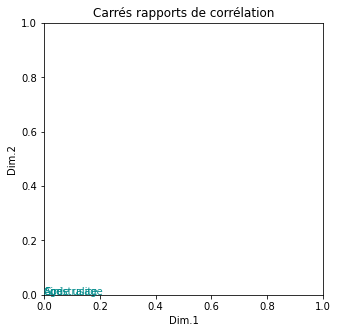

In [ ]:
#réprésentation des variables dans le plan
fix,ax = plt.subplots(figsize=(5,5))
ax.axis([0,+1,0,+1])
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carrés rapports de corrélation")

for i in range(3):
    ax.text(eta2[i,0],eta2[i,1],D.columns[i],color='darkcyan')
          
plt.show()


In [ ]:
#coordonnées des individus dans le plan
D2 = pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['Coord.F1','Coord.F2'])
D2

,Coord.F1,Coord.F2
KIDEN,,
1,-0.459008,0.089860
2,-0.748846,0.217382
3,-0.759107,0.252807
8,-0.496440,-0.005521
11,-0.555351,-0.167139
...,...,...
1410,0.462720,0.610799
1412,-0.748846,0.217382
1413,-0.626073,-0.079528


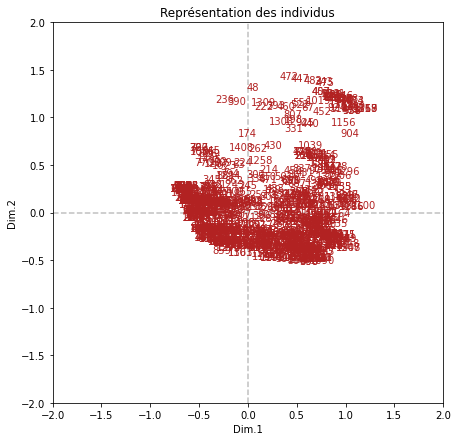

In [ ]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des individus")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
          
plt.show()

In [ ]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#générer la matrice des liens
Z = linkage(D2,method='ward',metric='euclidean')

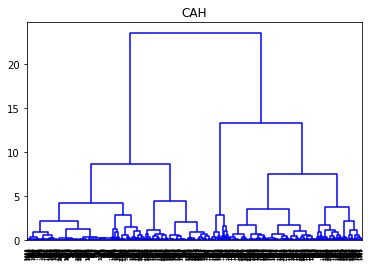

In [ ]:
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=D2.index,orientation='top',color_threshold=0)
plt.show()

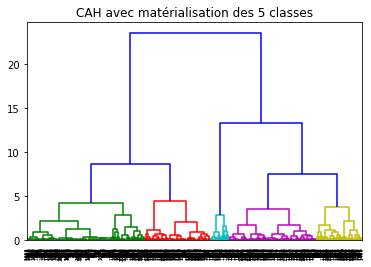

In [ ]:
#matérialisation des 4 classes (hauteur t = 6)
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z,labels=D2.index,orientation='top',color_threshold=6)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#découpage à la hauteur t = 6 ==> identifiants de 5 groupes obtenus
groupes_cah = fcluster(Z,t=6,criterion='distance')
groupes_cah

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [ ]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
idg

array([  0, 534, 533, ..., 167, 569, 671])

In [ ]:
#affichage des observations et leurs groupes
D_prime = pandas.DataFrame(D2.index[idg],groupes_cah[idg])
#print(D_prime.shape)
#print(D_prime.info)
D_prime['groupe'] = D_prime.index
D_prime

,KIDEN,groupe
1,1,1
1,694,1
1,692,1
1,691,1
1,689,1
...,...,...
5,106,5
5,1223,5
5,235,5
5,743,5


In [ ]:
D3 = D_prime.sample(n=100)
D3

,KIDEN,groupe
2,1078,2
5,1178,5
4,1281,4
1,496,1
1,611,1
...,...,...
4,912,4
4,593,4
5,214,5
2,635,2


In [ ]:
D2['KIDEN_col'] = D2.index
D2_prime = D2.rename(columns={"KIDEN": "KIDEN_col2"})
D2_prime

,Coord.F1,Coord.F2,KIDEN_col
KIDEN,,,
1,-0.459008,0.089860,1
2,-0.748846,0.217382,2
3,-0.759107,0.252807,3
8,-0.496440,-0.005521,8
11,-0.555351,-0.167139,11
...,...,...,...
1410,0.462720,0.610799,1410
1412,-0.748846,0.217382,1412
1413,-0.626073,-0.079528,1413


In [ ]:
D3_prime = D3.rename(columns={"KIDEN": "KIDEN_col"})
D3_prime

,KIDEN_col,groupe
2,1078,2
5,1178,5
4,1281,4
1,496,1
1,611,1
...,...,...
4,912,4
4,593,4
5,214,5
2,635,2


In [ ]:
D_Merge = pandas.merge(D2_prime, D3_prime, on='KIDEN_col')
D_Merge

,Coord.F1,Coord.F2,KIDEN_col,groupe
0,-0.519174,-0.062199,23,1
1,-0.759107,0.252807,26,1
2,-0.678124,0.129771,30,1
3,-0.318033,0.075895,51,1
4,-0.667863,0.094346,55,1
...,...,...,...,...
95,0.849302,-0.261202,1325,4
96,0.427994,-0.454319,1326,4
97,0.520230,-0.418991,1337,4
98,-0.289873,0.063485,1381,1


In [ ]:
import seaborn as sns
%matplotlib inline

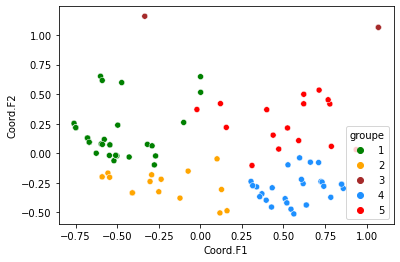

In [ ]:
g =sns.scatterplot(x="Coord.F1", y="Coord.F2",
              hue="groupe",
              data=D_Merge, palette=['green','orange','brown','dodgerblue','red'], legend='full');

[0.63338487 0.58733578 0.5824662  0.56335405 0.56236933 0.5584639
 0.54941168 0.54801903 0.54421395]


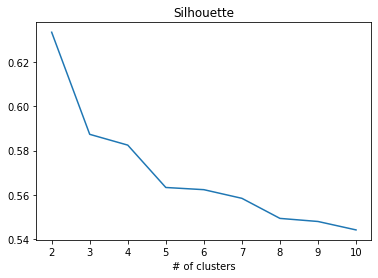

In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics
from sklearn import cluster
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters=k+2)
  km.fit(D2)
  res[k] = metrics.silhouette_score(D2,km.labels_)

print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [ ]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(D2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
Groupes_KMeans = pandas.DataFrame(D2.index[idk],kmeans.labels_[idk])
Groupes_KMeans

,KIDEN
0,1
0,501
0,500
0,499
0,498
...,...
1,947
1,948
1,949
1,942


In [ ]:
Groupes_KMeans['groupe_kmeans'] = Groupes_KMeans.index
Groupes_KMeans

,KIDEN,groupe_kmeans
0,1,0
0,501,0
0,500,0
0,499,0
0,498,0
...,...,...
1,947,1
1,948,1
1,949,1
1,942,1


In [ ]:
Groupes_KMeans_prime = Groupes_KMeans.rename(columns={"KIDEN": "KIDEN_col"})
Groupes_KMeans_prime

,KIDEN_col,groupe_kmeans
0,1,0
0,501,0
0,500,0
0,499,0
0,498,0
...,...,...
1,947,1
1,948,1
1,949,1
1,942,1


In [ ]:
KMeans_Merge = pandas.merge(D3_prime, Groupes_KMeans_prime, on='KIDEN_col')
KMeans_Merge2 = pandas.merge(KMeans_Merge, D2_prime, on='KIDEN_col')
KMeans_Merge2

,KIDEN_col,groupe,groupe_kmeans,Coord.F1,Coord.F2
0,1078,2,1,-0.590108,-0.198851
1,1178,5,1,0.787879,0.058918
2,1281,4,1,0.527043,-0.097407
3,496,1,0,-0.543746,0.071684
4,611,1,0,-0.667863,0.094346
...,...,...,...,...,...
95,912,4,1,0.562371,-0.512406
96,593,4,0,0.520230,-0.418991
97,214,5,0,0.121052,0.420449
98,635,2,0,-0.302159,-0.238344


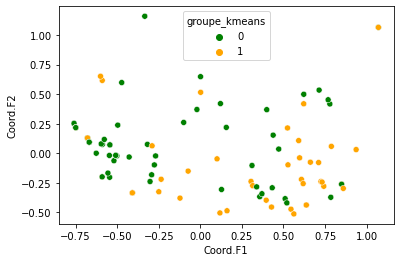

In [ ]:
g =sns.scatterplot(x="Coord.F1", y="Coord.F2",
              hue="groupe_kmeans",
              data=KMeans_Merge2, palette=['green','orange'], legend='full');

In [ ]:
#Arbre de décision
from sklearn import tree


In [ ]:
#Division du dataset en deux (test, train)
from sklearn.model_selection import train_test_split

train, test = train_test_split(D, test_size=0.2)

test

,Sinistralite,Code usage,Age,Sexe,Code Langue,Code postal,Bonus-malus n,Bonus-Malus n_1,Puissance,Date,Annee vehicule,Primes
KIDEN,,,,,,,,,,,,
1032,1,2,1,1,2,2,1,1,1,1,1,2
1161,2,2,2,2,1,2,1,2,2,2,1,3
1131,2,2,2,2,1,1,2,2,2,2,1,2
766,1,2,1,1,1,2,2,1,2,1,1,2
525,2,2,2,2,2,2,2,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2,2,2,1,1,2,2,2,1,2,1,3
1248,2,2,2,2,1,1,2,2,2,2,2,3
1364,2,2,2,2,1,2,2,2,2,1,2,2


In [ ]:
#Determination de train_x, train_y, test_x, test_y sans la varibale sinistralité 
X_train = train.loc[:, train.columns != 'Sinistralite']

y_train = train.loc[:, train.columns == 'Sinistralite']

X_test = test.loc[:, test.columns != 'Sinistralite']

y_test = test.loc[:, test.columns == 'Sinistralite']

In [ ]:
clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, y_train)

In [ ]:
#clf.predict(X_test)

In [ ]:
#clf.score(X_test, y_test)

[Text(145.1302436440678, 209.07692307692307, 'X[6] <= 1.5\ngini = 0.5\nsamples = 774\nvalue = [393, 381]'),
 Text(75.33591101694915, 192.35076923076923, 'X[9] <= 1.5\ngini = 0.25\nsamples = 382\nvalue = [326, 56]'),
 Text(49.47521186440678, 175.62461538461537, 'X[5] <= 1.5\ngini = 0.14\nsamples = 317\nvalue = [293, 24]'),
 Text(25.180932203389833, 158.89846153846153, 'X[10] <= 1.5\ngini = 0.12\nsamples = 297\nvalue = [278, 19]'),
 Text(9.45762711864407, 142.1723076923077, 'X[2] <= 1.5\ngini = 0.031\nsamples = 64\nvalue = [63, 1]'),
 Text(7.566101694915255, 125.44615384615385, 'X[1] <= 1.5\ngini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(5.674576271186441, 108.72, 'X[3] <= 1.5\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(3.7830508474576274, 91.99384615384615, 'X[4] <= 1.5\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(1.8915254237288137, 75.2676923076923, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(5.674576271186441, 75.2676923076923, 'X[0] <= 1.5\ngini = 0.12

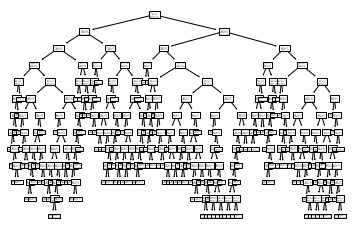

In [ ]:
tree.plot_tree(clf) 

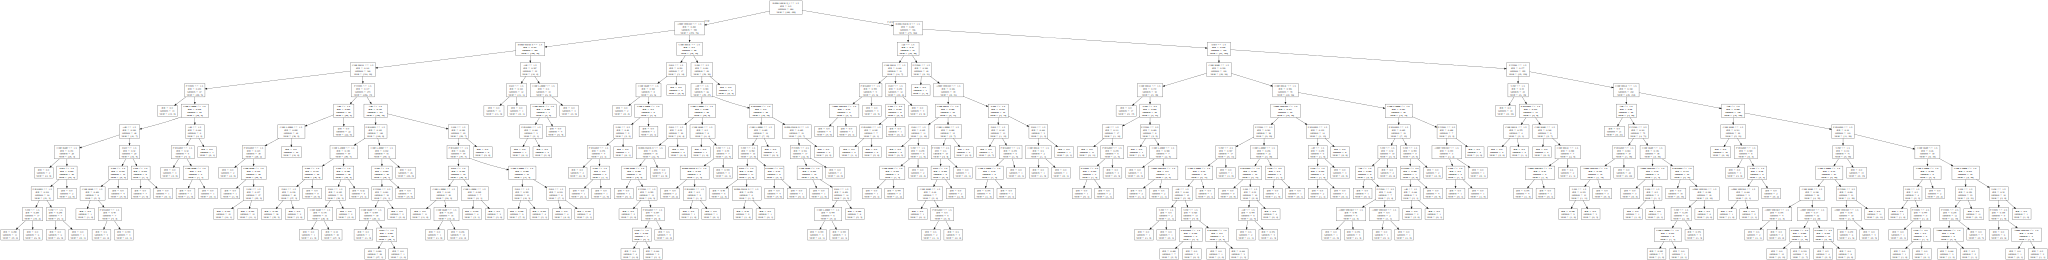

In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(clf, out_file=None, feature_names=X_test.columns))

In [ ]:
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X_test.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [ ]:
#Analyse discriminante
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf2 = LinearDiscriminantAnalysis()
clf2 = clf2.fit(X_train, y_train.values.ravel())

In [ ]:
clf2.predict(X_test)

array([1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2])

In [ ]:
clf2.score(X_test, y_test)

0.8603603603603603

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

[[94 16]
 [27 85]]
              precision    recall  f1-score   support

           1       0.78      0.85      0.81       110
           2       0.84      0.76      0.80       112

    accuracy                           0.81       222
   macro avg       0.81      0.81      0.81       222
weighted avg       0.81      0.81      0.81       222



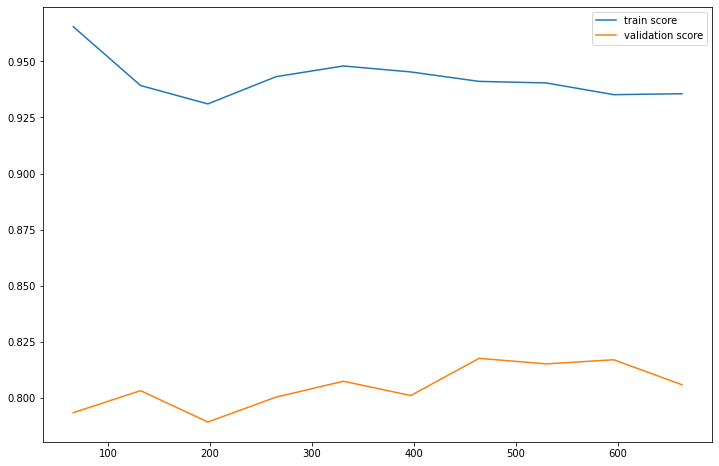

In [ ]:
evaluation(clf)

In [ ]:
#evaluation(clf2)